In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
plt.rc('figure', max_open_warning = 0)

In [2]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
X.shape,y.shape

((150, 4), (150,))

In [3]:
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X)

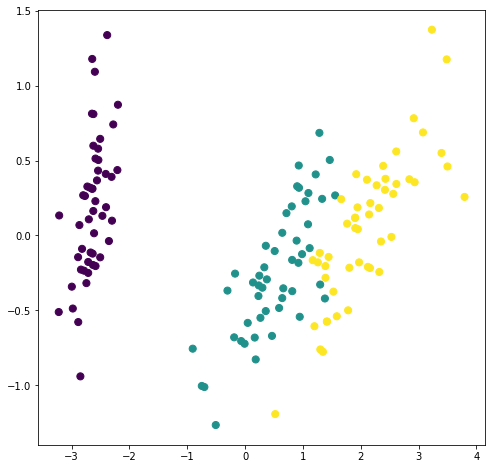

In [4]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.scatter(X_pca[:,0], X_pca[:,1],c=y,s=50)

In [5]:
import math
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing

In [6]:
def matrice_distance(data):
    d=euclidean_distances(data,data)
    d=preprocessing.normalize(d)
    return d

In [7]:
A=matrice_distance(X_pca)
B=d=matrice_distance(X)

In [8]:
def estimateur(data,d,sigma):
    f=[]
    for i in range(40):
        s=0
        for j in range(40):
            s=s+math.exp(- (d[i][j]**2)*(sigma**(-1)))
        f.append(s)
    return f

In [9]:
sigma=[0.01,0.1,1]

f=[estimateur(X,B,sigma) for sigma in sigma]

g=[estimateur(X_pca,A,sigma) for sigma in sigma] 

In [10]:
def KL(a, b):
    a = np.asarray(a, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

In [11]:
kl=[]
for i in range(3):
    kl.append(KL(f[i],g[i]))

In [12]:
RMSE=[]

MSE = np.square(np.subtract(B,A)).mean()

RMSE.append(math.sqrt(MSE))

In [13]:
from sklearn.manifold import trustworthiness

Trust=[]

Trust.append(sklearn.manifold.trustworthiness(B,A))

In [14]:
from sklearn.metrics import mean_squared_error

mse=[]

comp = pca.components_
com_tr = np.transpose(pca.components_)
proj = np.dot(X,com_tr)
recon = np.dot(proj,comp)
mse.append(mean_squared_error(X,recon))

In [15]:
Tab=pd.DataFrame([kl])
Tab.columns=['KL_0.01','KL_0.1','KL_1']
Tab['RMSE']=RMSE
Tab['Trust']=Trust
Tab['MSE']=mse
Tab

,KL_0.01,KL_0.1,KL_1,RMSE,Trust,MSE
0,-5.933719,-0.611317,-0.061317,0.003597,0.993296,0.125429
